In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uncertainties
from uncertainties import unumpy as unp
import pickle
import cv2
from skimage import io, color

import scipy
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import curve_fit

In [2]:
# Define the filenames of the videos 
file_H2O = np.array(['water_take2.avi','water_take3.avi','water_take4.avi'])
file_gly10 = np.array(['glycerol_10.avi','glycerol_10_take2.avi', 'glycerol_10_take3.avi'])
file_gly25 = np.array(['glycerol_25_take6.avi', 'glycerol_25_take5.avi', 'glycerol_10_take4.avi'])

In [61]:
# Enter constants, measured values, etc
r_real = 1e-6 # meter    
r_pixel = 21 # pixel
conversion = r_real/r_pixel # meter per pixel

R = 8.3144626181532
T_H2O = 297.5 # Kelvin
T_gly = 297.6 # Kelvin
visco_H2O = 1e-3
visco_gly10 = 1.2354*1e-3
visco_gly25 = 2.1267*1e-3

r = 1e-6 # 1 micro meter in SI (meter)

### Solution1: H2O; Videos: Water_take2, take3, and take4

In [62]:
# New Attempt

### 1st video, water_take2
# Load the arrays from the file using pickle
with open('H2O1_600frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)

x_H2O1, x_H2O2 = x_H2O[0:300], x_H2O[300:600]
y_H2O1, y_H2O2 = y_H2O[0:300], y_H2O[300:600]
MS_H2O1 = ((np.array(x_H2O1) - x_H2O1[0])*conversion)**2 + ((np.array(y_H2O1) - y_H2O1[0])*conversion)**2
MS_H2O2 = ((np.array(x_H2O2) - x_H2O2[0])*conversion)**2 + ((np.array(y_H2O2) - y_H2O2[0])*conversion)**2

with open('H2O2_600frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)
    
x_H2O3, x_H2O4 = x_H2O[0:300], x_H2O[300:600]
y_H2O3, y_H2O4 = y_H2O[0:300], y_H2O[300:600]
#print(len(np.array(x_H2O3) - x_H2O3[0]))
#print(len(np.array(y_H2O3) - y_H2O3[0]))
MS_H2O3 = ((np.array(x_H2O3) - x_H2O3[0])*conversion)**2 + ((np.array(y_H2O3) - y_H2O3[0])*conversion)**2
MS_H2O4 = ((np.array(x_H2O4) - x_H2O4[0])*conversion)**2 + ((np.array(y_H2O4) - y_H2O4[0])*conversion)**2

with open('H2O3_600frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)
x_H2O5, x_H2O6 = x_H2O[0:300], x_H2O[300:600]
y_H2O5, y_H2O6 = y_H2O[0:300], y_H2O[300:600]
MS_H2O5 = ((np.array(x_H2O5) - x_H2O5[0])*conversion)**2 + ((np.array(y_H2O5) - y_H2O5[0])*conversion)**2
MS_H2O6 = ((np.array(x_H2O6) - x_H2O6[0])*conversion)**2 + ((np.array(y_H2O6) - y_H2O6[0])*conversion)**2

# Creates a time sequel array
t_arr = np.arange(len(x_H2O1)) * 1/30

In [64]:
# Creates error arrays; uncertainty in x and y is 1 pixel and in t is 1/30 seconds
pixel_err = np.full((1, len(x_H2O1)), 1.0)
t_err = np.full((1, len(x_H2O1)), 1/30)[0]

### Now combine with the value and uncertainty arrays

# Video1 x and y
x_full_H2O1 = unp.uarray(x_H2O1, pixel_err)
y_full_H2O1 = unp.uarray(y_H2O1, pixel_err)

# Video2 x and y
x_full_H2O2 = unp.uarray(x_H2O2, pixel_err)
y_full_H2O2 = unp.uarray(y_H2O2, pixel_err)

# Video3 x and y
x_full_H2O3 = unp.uarray(x_H2O3, pixel_err)
y_full_H2O3 = unp.uarray(y_H2O3, pixel_err)

# Video4 x and y
x_full_H2O4 = unp.uarray(x_H2O4, pixel_err)
y_full_H2O4 = unp.uarray(y_H2O4, pixel_err)

# Video5 x and y
x_full_H2O5 = unp.uarray(x_H2O5, pixel_err)
y_full_H2O5 = unp.uarray(y_H2O5, pixel_err)

# Video6 x and y
x_full_H2O6 = unp.uarray(x_H2O6, pixel_err)
y_full_H2O6 = unp.uarray(y_H2O6, pixel_err)


# time array
t_full = unp.uarray(t_arr, t_err)

# Distance squared 
MS_H2O1 = ((np.array(x_full_H2O1) - x_full_H2O1[0][0])*conversion)**2 + ((np.array(y_full_H2O1) - y_full_H2O1[0][0])*conversion)**2
MS_H2O2 = ((np.array(x_full_H2O2) - x_full_H2O2[0][0])*conversion)**2 + ((np.array(y_full_H2O2) - y_full_H2O2[0][0])*conversion)**2
MS_H2O3 = ((np.array(x_full_H2O3) - x_full_H2O3[0][0])*conversion)**2 + ((np.array(y_full_H2O3) - y_full_H2O3[0][0])*conversion)**2
MS_H2O4 = ((np.array(x_full_H2O4) - x_full_H2O4[0][0])*conversion)**2 + ((np.array(y_full_H2O4) - y_full_H2O4[0][0])*conversion)**2
MS_H2O5 = ((np.array(x_full_H2O5) - x_full_H2O5[0][0])*conversion)**2 + ((np.array(y_full_H2O5) - y_full_H2O5[0][0])*conversion)**2
MS_H2O6 = ((np.array(x_full_H2O6) - x_full_H2O6[0][0])*conversion)**2 + ((np.array(y_full_H2O6) - y_full_H2O6[0][0])*conversion)**2


MSD = (MS_H2O1+MS_H2O2+MS_H2O3+MS_H2O4+MS_H2O5+MS_H2O6)/6
MSD_val = unp.nominal_values(MSD)[0]
MSD_err = unp.std_devs(MSD)[0]

Text(579, 217, 'end')

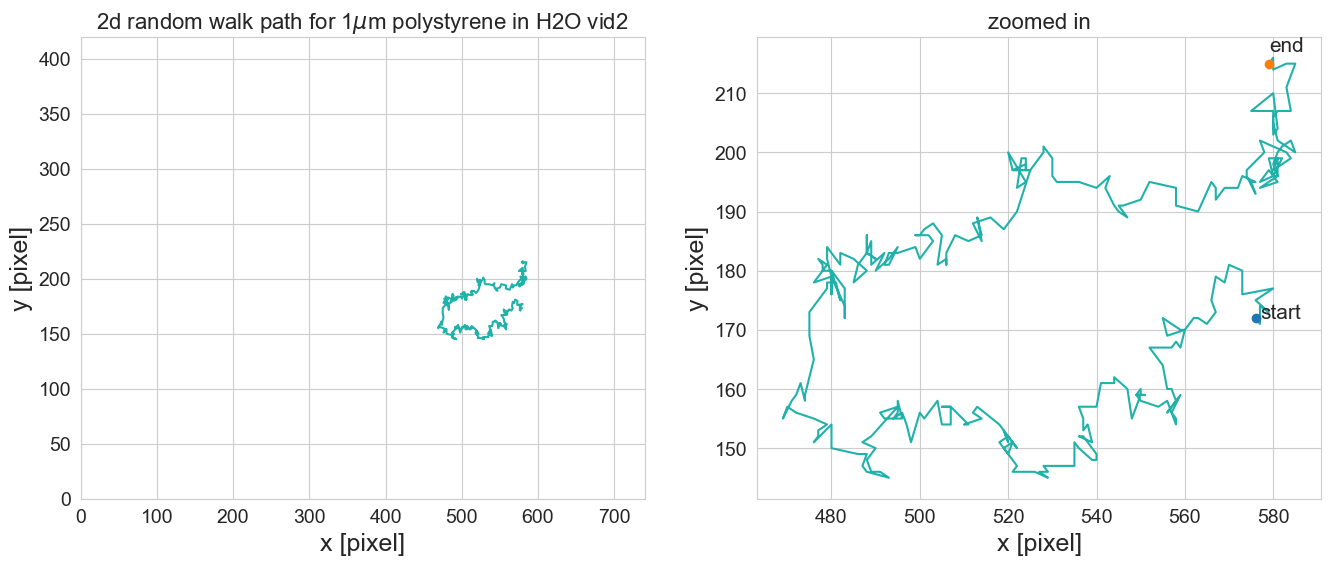

In [65]:
# 2 panel 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_title('2d random walk path for 1$\mu$m polystyrene in H2O vid2',
    fontsize=16)

ax[0].set_xlim(0, 740)
ax[0].set_ylim(0, 420)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_xlabel('x [pixel]', fontsize=18)
ax[0].set_ylabel('y [pixel]', fontsize=18)
ax[0].plot(x_H2O2, y_H2O2, color='lightseagreen')

ax[1].set_title('zoomed in',
    fontsize=16)
ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14) 
ax[1].set_xlabel('x [pixel]', fontsize=18)
ax[1].set_ylabel('y [pixel]', fontsize=18)
ax[1].plot(x_H2O2, y_H2O2, color='lightseagreen')
ax[1].plot(x_H2O2[0], y_H2O2[0], marker='o')
ax[1].text(x_H2O2[0]+1, y_H2O2[0],  'start', fontsize=15)
ax[1].plot(x_H2O2[-1], y_H2O2[-1], marker='o')
ax[1].text(x_H2O2[-1], y_H2O2[-1]+2,  'end', fontsize=15)

In [66]:
y1 = unp.nominal_values(MS_H2O1[0])
y1_err = unp.std_devs(MS_H2O1[0])

y2 = unp.nominal_values(MS_H2O2[0])
y2_err = unp.std_devs(MS_H2O2[0])

y3 = unp.nominal_values(MS_H2O3[0])
y3_err = unp.std_devs(MS_H2O3[0])

y4 = unp.nominal_values(MS_H2O4[0])
y4_err = unp.std_devs(MS_H2O4[0])

y5 = unp.nominal_values(MS_H2O5[0])
y5_err = unp.std_devs(MS_H2O5[0])

y6 = unp.nominal_values(MS_H2O6[0])
y6_err = unp.std_devs(MS_H2O6[0])

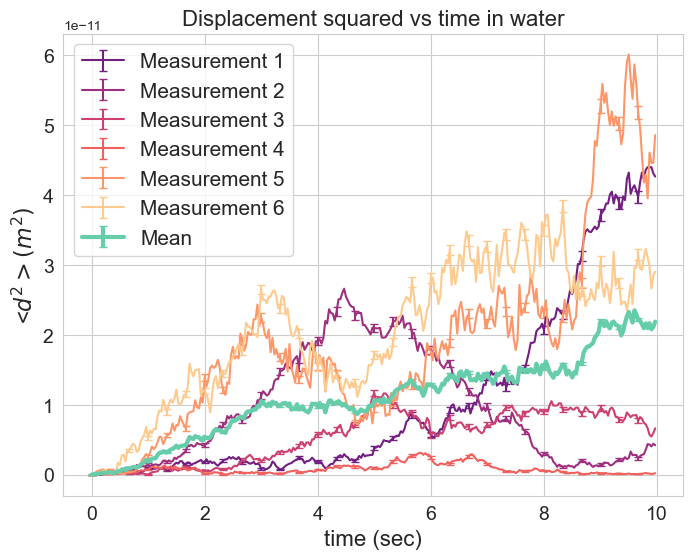

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")
plt.title('Displacement squared vs time in water', fontsize=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
plt.xlabel('time (sec)', fontsize=16)
plt.ylabel('<$d^2> (m^2)$', fontsize=16)

colors = sns.color_palette("magma", 8)

# Vid 1
plt.errorbar(t_arr, y1, yerr=y1_err, errorevery =(0, 10), capsize=3, label='Measurement 1', color=colors[2])#, barsabove=True)

# Vid 2
plt.errorbar(t_arr, y2, yerr=y2_err, errorevery =(0, 10), capsize=3, label='Measurement 2', color=colors[3])#, barsabove=True)

# Vid 3
plt.errorbar(t_arr, y3, yerr=y3_err, errorevery =(0, 10), capsize=3, label='Measurement 3', color=colors[4])#, barsabove=True)

# Vid 4
plt.errorbar(t_arr, y4, yerr=y4_err, errorevery =(0, 10), capsize=3, label='Measurement 4', color=colors[5])#, barsabove=True)

# Vid 5
plt.errorbar(t_arr, y5, yerr=y5_err, errorevery =(0, 10), capsize=3, label='Measurement 5', color=colors[6])#, barsabove=True)

# Vid 6
plt.errorbar(t_arr, y6, yerr=y6_err, errorevery =(0, 10), capsize=3, label='Measurement 6', color=colors[7])#, barsabove=True)




# Combined: 
plt.errorbar(t_arr, MSD_val, yerr=MSD_err, color='mediumaquamarine', errorevery =(0, 10), capsize=3, label='Mean', linewidth=3)#, barsabove=True)
# Put a legend to the right of the current axis
ax.legend(loc='upper left', prop = { "size": 15 })#, bbox_to_anchor=(1, 0.5))

In [68]:
# Create a DataFrame
df = pd.DataFrame({'time': t_arr, 'time error':t_err[0], 'MSD value': MSD_val, 'MSD error': MSD_err})

# save dataframe to csv file
df.to_csv('MSD_water.csv', index=False)

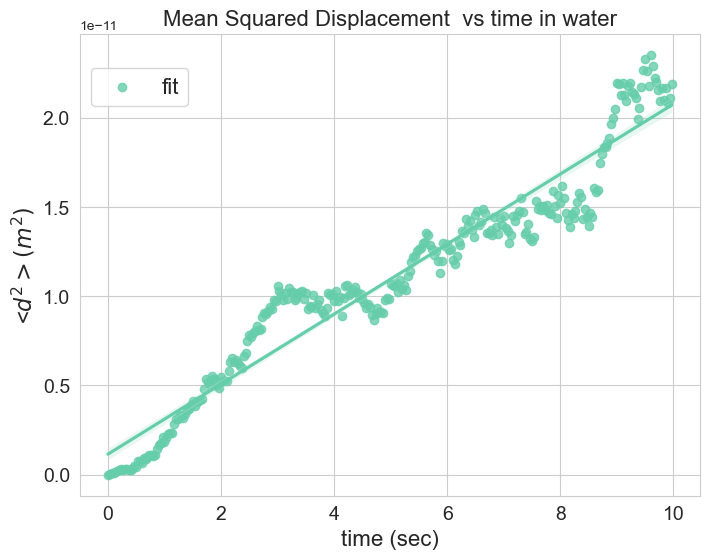

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
data = pd.read_csv('MSD_water.csv')
sns.regplot(x="time", y="MSD value", data=data, label='fit', color='mediumaquamarine');#: y=(1.165 ± 0.019)$*10^{-13}$ x');
# Set the axis labels
ax.set_ylabel('<$d^2> (m^2)$', fontsize=16)

ax.set_title('Mean Squared Displacement  vs time in water',
    fontsize=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
ax.set_xlabel('time (sec)', fontsize=16)

ax.legend(loc='upper left', prop = { "size": 16 }, bbox_to_anchor=(0, .95))


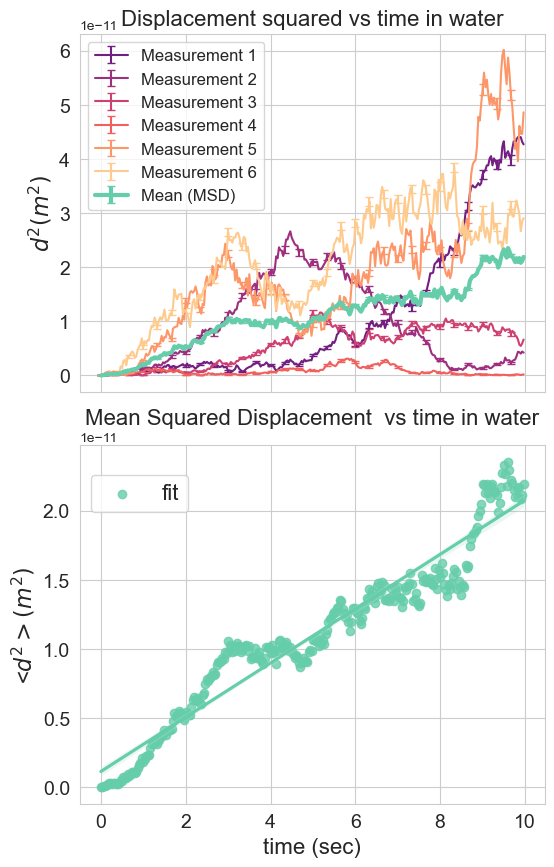

In [71]:
fig, ax = plt.subplots(2, 1, figsize=(6, 10),  sharex=True)
fig.subplots_adjust(hspace=.15)
sns.set_style("whitegrid")

ax[0].set_title('Displacement squared vs time in water',
    fontsize=16)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_ylabel('$d^2 (m^2)$', fontsize=16)

colors = sns.color_palette("magma", 8)

# Vid 1
ax[0].errorbar(t_arr, y1, yerr=y1_err, errorevery =(0, 10), capsize=3, label='Measurement 1', color=colors[2])#, barsabove=True)

# Vid 2
ax[0].errorbar(t_arr, y2, yerr=y2_err, errorevery =(0, 10), capsize=3, label='Measurement 2', color=colors[3])#, barsabove=True)

# Vid 3
ax[0].errorbar(t_arr, y3, yerr=y3_err, errorevery =(0, 10), capsize=3, label='Measurement 3', color=colors[4])#, barsabove=True)

# Vid 4
ax[0].errorbar(t_arr, y4, yerr=y4_err, errorevery =(0, 10), capsize=3, label='Measurement 4', color=colors[5])#, barsabove=True)

# Vid 5
ax[0].errorbar(t_arr, y5, yerr=y5_err, errorevery =(0, 10), capsize=3, label='Measurement 5', color=colors[6])#, barsabove=True)

# Vid 6
ax[0].errorbar(t_arr, y6, yerr=y6_err, errorevery =(0, 10), capsize=3, label='Measurement 6', color=colors[7])#, barsabove=True)

# Combined: 
ax[0].errorbar(t_arr, MSD_val, yerr=MSD_err, errorevery =(0, 10), capsize=3, label='Mean (MSD)', linewidth=3, color='mediumaquamarine')#, barsabove=True)
ax[0].legend(loc='upper left', prop = { "size": 12 })#, bbox_to_anchor=(1, 0.5))

data = pd.read_csv('MSD_water.csv')
sns.regplot(x="time", y="MSD value", data=data, ax=ax[1], label='fit', color='mediumaquamarine');#: y=(1.165 ± 0.019)$*10^{-13}$ x');
# Set the axis labels
ax[1].set_ylabel('<$d^2> (m^2)$', fontsize=16)

ax[1].set_title('Mean Squared Displacement  vs time in water',
    fontsize=16)
ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14) 
ax[1].set_xlabel('time (sec)', fontsize=16)

ax[1].legend(loc='upper left', prop = { "size": 16 }, bbox_to_anchor=(0, .95))


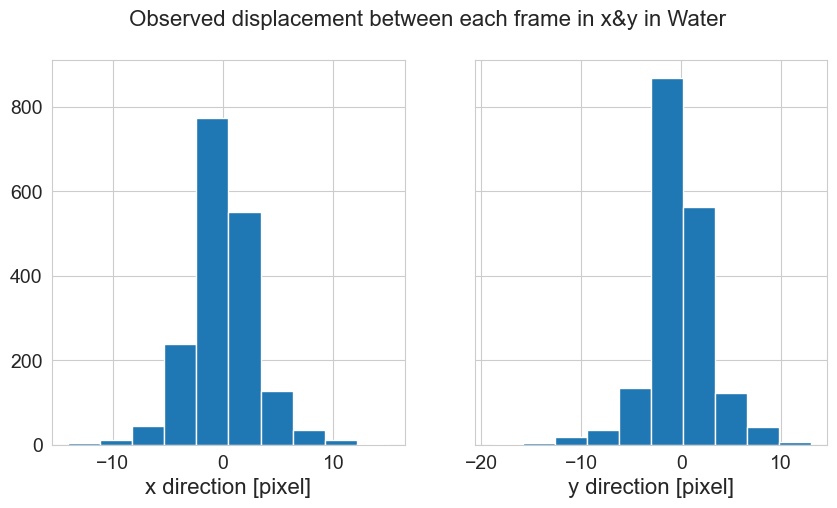

In [72]:
x_diff = []
y_diff = []

for i in range(1, 300):
    x_diff.append(x_H2O1[i-1]-x_H2O1[i])
    x_diff.append(x_H2O2[i-1]-x_H2O2[i])
    x_diff.append(x_H2O3[i-1]-x_H2O3[i])
    x_diff.append(x_H2O4[i-1]-x_H2O4[i])
    x_diff.append(x_H2O5[i-1]-x_H2O5[i])
    x_diff.append(x_H2O6[i-1]-x_H2O6[i])
    
    y_diff.append(y_H2O1[i-1]-y_H2O1[i]) 
    y_diff.append(y_H2O2[i-1]-y_H2O2[i])
    y_diff.append(y_H2O3[i-1]-y_H2O3[i])
    y_diff.append(y_H2O4[i-1]-y_H2O4[i])
    y_diff.append(y_H2O5[i-1]-y_H2O5[i])
    y_diff.append(y_H2O6[i-1]-y_H2O6[i])

fig, ax = plt.subplots(1, 2, figsize=(10, 5),  sharey=True)
fig.subplots_adjust(hspace=0.1)
sns.set_style("whitegrid")
fig.suptitle('Observed displacement between each frame in x&y in Water',
    fontsize=16)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_xlabel('x direction [pixel]', fontsize=16)
x_hist = ax[0].hist((x_diff), bins=10)

ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_xlabel('y direction [pixel]', fontsize=16)
y_hist = ax[1].hist((y_diff), bins=10)

#  D = $\frac{RT}{6\pi N_A \eta r}$ & $N_A = \frac{RT}{6\pi D \eta r} $

# $<d^2>=4Dt$ & $D=\frac{slope}{4}$

In [73]:
def avogadro_calculated(D, T, eta, R, r):
    n = R*T
    d = 6*np.pi*D*eta*r
    return n/d # This is Avogadro number

In [74]:
def NA_err(N_A, T, Tsig, D, Dsig, r, rsig):
    NAsig = N_A*np.sqrt((Tsig/T)**2 + (Dsig/D)**2 + (rsig/r)**2)
    return NAsig

In [75]:
NA_H2O = avogadro_calculated(2.156e-12/4, T_H2O, visco_H2O, R, r)
NA_err_H2O = NA_err(NA_H2O, T_H2O, 0.01, 2.156e-12/4, 2.226e-14/4, 1, 0.035)
NA_H2O_full = unp.uarray(NA_H2O, NA_err_H2O)

In [76]:
avogadro_calculated(4.9e-13, T_H2O, visco_H2O, R, r)

2.6780825026359143e+23

### Solution2: Glycerol10%; Videos: glycerol_10, take2, and take 3

In [77]:
with open('g10_vid1_1200frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)

x_H2O1, x_H2O2, x_H2O3, x_H2O4 = x_H2O[0:300], x_H2O[300:600], x_H2O[600:900], x_H2O[900:1200]
y_H2O1, y_H2O2, y_H2O3, y_H2O4 = y_H2O[0:300], y_H2O[300:600], y_H2O[600:900], y_H2O[900:1200]

MS_H2O1 = ((np.array(x_H2O1) - x_H2O1[0])*conversion)**2 + ((np.array(y_H2O1) - y_H2O1[0])*conversion)**2
MS_H2O2 = ((np.array(x_H2O2) - x_H2O2[0])*conversion)**2 + ((np.array(y_H2O2) - y_H2O2[0])*conversion)**2
MS_H2O3 = ((np.array(x_H2O3) - x_H2O3[0])*conversion)**2 + ((np.array(y_H2O3) - y_H2O3[0])*conversion)**2
MS_H2O4 = ((np.array(x_H2O4) - x_H2O4[0])*conversion)**2 + ((np.array(y_H2O4) - y_H2O4[0])*conversion)**2


with open('g10_vid2_600frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)
    
x_H2O5, x_H2O6 = x_H2O[0:300], x_H2O[300:600]
y_H2O5, y_H2O6 = y_H2O[0:300], y_H2O[300:600]

MS_H2O5 = ((np.array(x_H2O5) - x_H2O5[0])*conversion)**2 + ((np.array(y_H2O5) - y_H2O5[0])*conversion)**2
MS_H2O6 = ((np.array(x_H2O6) - x_H2O6[0])*conversion)**2 + ((np.array(y_H2O6) - y_H2O6[0])*conversion)**2

# Creates a time sequel array
t_arr = np.arange(len(x_H2O1)) * 1/30

In [78]:
# Creates error arrays; uncertainty in x and y is 1 pixel and in t is 1/30 seconds
pixel_err = np.full((1, len(x_H2O1)), 1.0)
t_err = np.full((1, len(x_H2O1)), 1/30)[0]

### Now combine with the value and uncertainty arrays

# Video1 x and y
x_full_H2O1 = unp.uarray(x_H2O1, pixel_err)
y_full_H2O1 = unp.uarray(y_H2O1, pixel_err)

# Video2 x and y
x_full_H2O2 = unp.uarray(x_H2O2, pixel_err)
y_full_H2O2 = unp.uarray(y_H2O2, pixel_err)

# Video3 x and y
x_full_H2O3 = unp.uarray(x_H2O3, pixel_err)
y_full_H2O3 = unp.uarray(y_H2O3, pixel_err)

# Video4 x and y
x_full_H2O4 = unp.uarray(x_H2O4, pixel_err)
y_full_H2O4 = unp.uarray(y_H2O4, pixel_err)

# Video5 x and y
x_full_H2O5 = unp.uarray(x_H2O5, pixel_err)
y_full_H2O5 = unp.uarray(y_H2O5, pixel_err)

# Video6 x and y
x_full_H2O6 = unp.uarray(x_H2O6, pixel_err)
y_full_H2O6 = unp.uarray(y_H2O6, pixel_err)


# time array
t_full = unp.uarray(t_arr, t_err)

# Distance squared 
MS_H2O1 = ((np.array(x_full_H2O1) - x_full_H2O1[0][0])*conversion)**2 + ((np.array(y_full_H2O1) - y_full_H2O1[0][0])*conversion)**2
MS_H2O2 = ((np.array(x_full_H2O2) - x_full_H2O2[0][0])*conversion)**2 + ((np.array(y_full_H2O2) - y_full_H2O2[0][0])*conversion)**2
MS_H2O3 = ((np.array(x_full_H2O3) - x_full_H2O3[0][0])*conversion)**2 + ((np.array(y_full_H2O3) - y_full_H2O3[0][0])*conversion)**2
MS_H2O4 = ((np.array(x_full_H2O4) - x_full_H2O4[0][0])*conversion)**2 + ((np.array(y_full_H2O4) - y_full_H2O4[0][0])*conversion)**2
MS_H2O5 = ((np.array(x_full_H2O5) - x_full_H2O5[0][0])*conversion)**2 + ((np.array(y_full_H2O5) - y_full_H2O5[0][0])*conversion)**2
MS_H2O6 = ((np.array(x_full_H2O6) - x_full_H2O6[0][0])*conversion)**2 + ((np.array(y_full_H2O6) - y_full_H2O6[0][0])*conversion)**2


MSD = (MS_H2O1+MS_H2O2+MS_H2O3+MS_H2O4+MS_H2O5+MS_H2O6)/6
MSD_val = unp.nominal_values(MSD)[0]
MSD_err = unp.std_devs(MSD)[0]

In [79]:
y1 = unp.nominal_values(MS_H2O1[0])
y1_err = unp.std_devs(MS_H2O1[0])

y2 = unp.nominal_values(MS_H2O2[0])
y2_err = unp.std_devs(MS_H2O2[0])

y3 = unp.nominal_values(MS_H2O3[0])
y3_err = unp.std_devs(MS_H2O3[0])

y4 = unp.nominal_values(MS_H2O4[0])
y4_err = unp.std_devs(MS_H2O4[0])

y5 = unp.nominal_values(MS_H2O5[0])
y5_err = unp.std_devs(MS_H2O5[0])

y6 = unp.nominal_values(MS_H2O6[0])
y6_err = unp.std_devs(MS_H2O6[0])

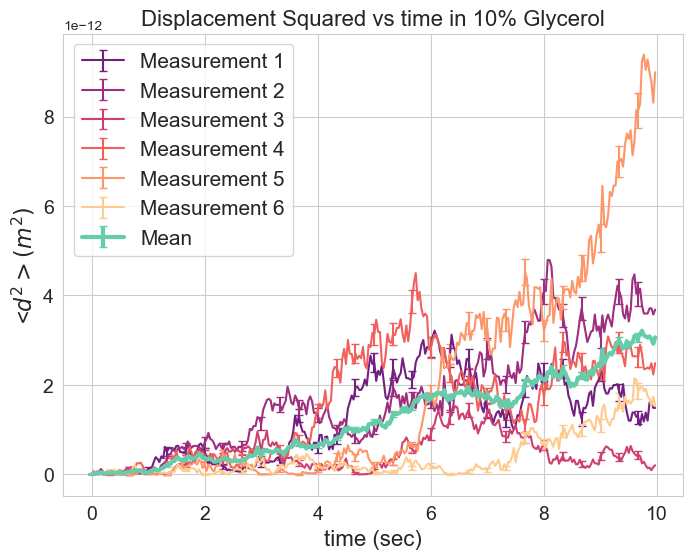

In [80]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")

plt.title('Displacement Squared vs time in 10% Glycerol',
    fontsize=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
plt.xlabel('time (sec)', fontsize=16)
plt.ylabel('<$d^2> (m^2)$', fontsize=16)
colors = sns.color_palette("magma", 8)

# Vid 1
plt.errorbar(t_arr, y1, yerr=y1_err, errorevery =(0, 10), capsize=3, label='Measurement 1', color=colors[2])#, barsabove=True)

# Vid 2
plt.errorbar(t_arr, y2, yerr=y2_err, errorevery =(0, 10), capsize=3, label='Measurement 2', color=colors[3])#, barsabove=True)

# Vid 3
plt.errorbar(t_arr, y3, yerr=y3_err, errorevery =(0, 10), capsize=3, label='Measurement 3', color=colors[4])#, barsabove=True)

# Vid 4
plt.errorbar(t_arr, y4, yerr=y4_err, errorevery =(0, 10), capsize=3, label='Measurement 4', color=colors[5])#, barsabove=True)

# Vid 5
plt.errorbar(t_arr, y5, yerr=y5_err, errorevery =(0, 10), capsize=3, label='Measurement 5', color=colors[6])#, barsabove=True)

# Vid 6
plt.errorbar(t_arr, y6, yerr=y6_err, errorevery =(0, 10), capsize=3, label='Measurement 6', color=colors[7])#, barsabove=True)




# Combined: 
plt.errorbar(t_arr, MSD_val, yerr=MSD_err, color='mediumaquamarine', errorevery =(0, 10), capsize=3, label='Mean', linewidth=3)#, barsabove=True)
# Put a legend to the right of the current axis
ax.legend(loc='upper left', prop = { "size": 15 })#, bbox_to_anchor=(1, 0.5))

In [81]:
# Create a DataFrame
df = pd.DataFrame({'time': t_arr, 'time error':t_err[0], 'MSD value': MSD_val, 'MSD error': MSD_err})

# save dataframe to csv file
df.to_csv('MSD_gly10.csv', index=False)

In [82]:
NA_gly10 = avogadro_calculated(2.541e-13/4, T_gly, visco_gly10, R, r)
NA_err_gly10 = NA_err(NA_gly10, T_gly, 0.01, 2.541e-13/4, 3.765e-15/4, 1, 0.035)
NA_full_gly10 = unp.uarray(NA_gly10,NA_err_gly10)

In [83]:
print("Avogadro's number for 10% Glycerol:", NA_gly10, '±' ,NA_err_gly10)

Avogadro's number for 10% Glycerol: 1.6726832891630635e+24 ± 6.357395112285708e+22


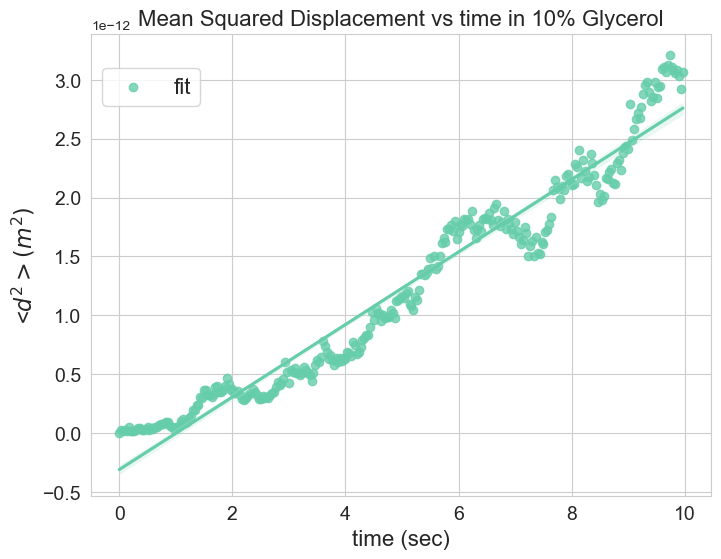

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
data = pd.read_csv('MSD_gly10.csv')
sns.regplot(x="time", y="MSD value", data=data, label='fit', color='mediumaquamarine');#: y=(1.165 ± 0.019)$*10^{-13}$ x');
# Set the axis labels
ax.set_ylabel('<$d^2> (m^2)$', fontsize=16)

ax.set_title('Mean Squared Displacement vs time in 10% Glycerol',
    fontsize=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
ax.set_xlabel('time (sec)', fontsize=16)

ax.legend(loc='upper left', prop = { "size": 16 }, bbox_to_anchor=(0, .95))

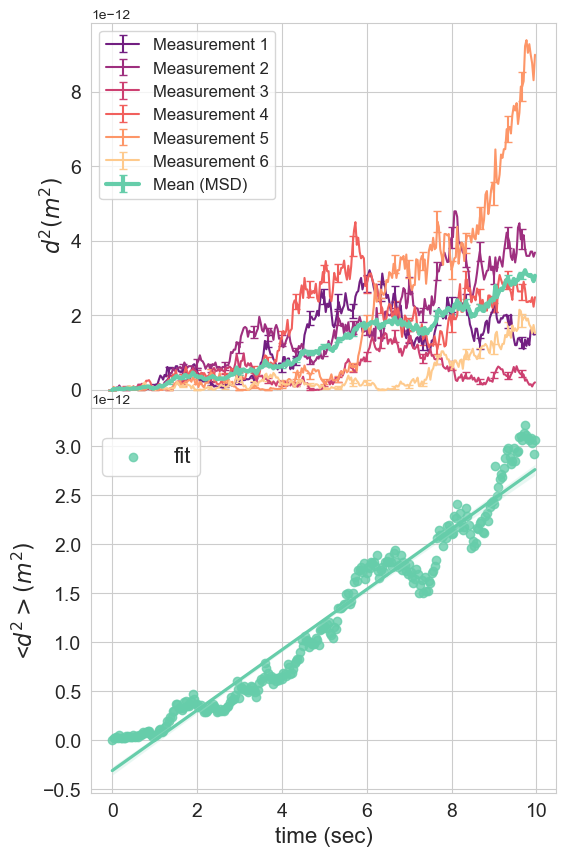

In [85]:
fig, ax = plt.subplots(2, 1, figsize=(6, 10),  sharex=True)
fig.subplots_adjust(hspace=0)
sns.set_style("whitegrid")

#plt.title(' Mean Square Displacement vs time for 1$\mu$m polystyrene in 25% Glycerol',
#    fontsize=16)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_xlabel('time (sec)', fontsize=16)
ax[0].set_ylabel('$d^2 (m^2)$', fontsize=16)

# Vid 1
ax[0].errorbar(t_arr, y1, yerr=y1_err, errorevery =(0, 10), capsize=3, label='Measurement 1', color=colors[2])#, barsabove=True)

# Vid 2
ax[0].errorbar(t_arr, y2, yerr=y2_err, errorevery =(0, 10), capsize=3, label='Measurement 2', color=colors[3])#, barsabove=True)

# Vid 3
ax[0].errorbar(t_arr, y3, yerr=y3_err, errorevery =(0, 10), capsize=3, label='Measurement 3', color=colors[4])#, barsabove=True)

# Vid 4
ax[0].errorbar(t_arr, y4, yerr=y4_err, errorevery =(0, 10), capsize=3, label='Measurement 4', color=colors[5])#, barsabove=True)

# Vid 5
ax[0].errorbar(t_arr, y5, yerr=y5_err, errorevery =(0, 10), capsize=3, label='Measurement 5', color=colors[6])#, barsabove=True)

# Vid 6
ax[0].errorbar(t_arr, y6, yerr=y6_err, errorevery =(0, 10), capsize=3, label='Measurement 6', color=colors[7])#, barsabove=True)

# Combined: 
ax[0].errorbar(t_arr, MSD_val, yerr=MSD_err, errorevery =(0, 10), capsize=3, label='Mean (MSD)', linewidth=3, color='mediumaquamarine')#, barsabove=True)
ax[0].legend(loc='upper left', prop = { "size": 12 })#, bbox_to_anchor=(1, 0.5))

data = pd.read_csv('MSD_gly10.csv')
sns.regplot(x="time", y="MSD value", data=data, ax=ax[1], label='fit', color='mediumaquamarine');#: y=(1.165 ± 0.019)$*10^{-13}$ x');
# Set the axis labels
ax[1].set_ylabel('<$d^2> (m^2)$', fontsize=16)

ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14) 
ax[1].set_xlabel('time (sec)', fontsize=16)

ax[1].legend(loc='upper left', prop = { "size": 16 }, bbox_to_anchor=(0, .95))


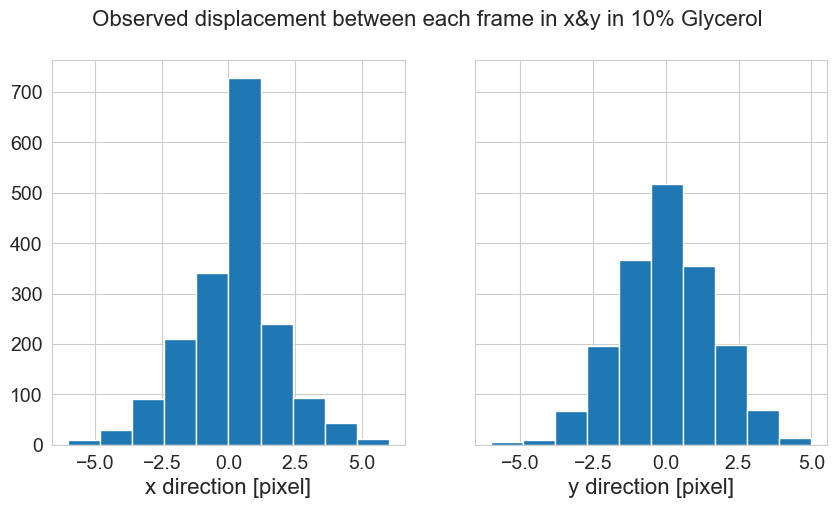

In [86]:
x_diff = []
y_diff = []

for i in range(1, 300):
    x_diff.append(x_H2O1[i-1]-x_H2O1[i])
    x_diff.append(x_H2O2[i-1]-x_H2O2[i])
    x_diff.append(x_H2O3[i-1]-x_H2O3[i])
    x_diff.append(x_H2O4[i-1]-x_H2O4[i])
    x_diff.append(x_H2O5[i-1]-x_H2O5[i])
    x_diff.append(x_H2O6[i-1]-x_H2O6[i])
    
    y_diff.append(y_H2O1[i-1]-y_H2O1[i]) 
    y_diff.append(y_H2O2[i-1]-y_H2O2[i])
    y_diff.append(y_H2O3[i-1]-y_H2O3[i])
    y_diff.append(y_H2O4[i-1]-y_H2O4[i])
    y_diff.append(y_H2O5[i-1]-y_H2O5[i])
    y_diff.append(y_H2O6[i-1]-y_H2O6[i])

fig, ax = plt.subplots(1, 2, figsize=(10, 5),  sharey=True)
fig.subplots_adjust(hspace=0.1)
sns.set_style("whitegrid")
fig.suptitle('Observed displacement between each frame in x&y in 10% Glycerol',
    fontsize=16)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_xlabel('x direction [pixel]', fontsize=16)
x_hist = ax[0].hist((x_diff), bins=10)

ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_xlabel('y direction [pixel]', fontsize=16)
y_hist = ax[1].hist((y_diff), bins=10)

### Solution3: Glycerol25%; Videos: glycerol_10, take2, and take 3

In [87]:
with open('g25_vid2_1200frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)

x_H2O1, x_H2O2, x_H2O3, x_H2O4 = x_H2O[0:300], x_H2O[300:600], x_H2O[600:900], x_H2O[900:1200]
y_H2O1, y_H2O2, y_H2O3, y_H2O4 = y_H2O[0:300], y_H2O[300:600], y_H2O[600:900], y_H2O[900:1200]

MS_H2O1 = ((np.array(x_H2O1) - x_H2O1[0])*conversion)**2 + ((np.array(y_H2O1) - y_H2O1[0])*conversion)**2
MS_H2O2 = ((np.array(x_H2O2) - x_H2O2[0])*conversion)**2 + ((np.array(y_H2O2) - y_H2O2[0])*conversion)**2
MS_H2O3 = ((np.array(x_H2O3) - x_H2O3[0])*conversion)**2 + ((np.array(y_H2O3) - y_H2O3[0])*conversion)**2
MS_H2O4 = ((np.array(x_H2O4) - x_H2O4[0])*conversion)**2 + ((np.array(y_H2O4) - y_H2O4[0])*conversion)**2


with open('g25_vid3_600frame.pkl', 'rb') as f:
    x_H2O, y_H2O = pickle.load(f)
    
x_H2O5, x_H2O6 = x_H2O[0:300], x_H2O[300:600]
y_H2O5, y_H2O6 = y_H2O[0:300], y_H2O[300:600]

MS_H2O5 = ((np.array(x_H2O5) - x_H2O5[0])*conversion)**2 + ((np.array(y_H2O5) - y_H2O5[0])*conversion)**2
MS_H2O6 = ((np.array(x_H2O6) - x_H2O6[0])*conversion)**2 + ((np.array(y_H2O6) - y_H2O6[0])*conversion)**2

# Creates a time sequel array
t_arr = np.arange(len(x_H2O1)) * 1/30

In [88]:
# Creates error arrays; uncertainty in x and y is 1 pixel and in t is 1/30 seconds
pixel_err = np.full((1, len(x_H2O1)), 1.0)
t_err = np.full((1, len(x_H2O1)), 1/30)[0]

### Now combine with the value and uncertainty arrays

# Video1 x and y
x_full_H2O1 = unp.uarray(x_H2O1, pixel_err)
y_full_H2O1 = unp.uarray(y_H2O1, pixel_err)

# Video2 x and y
x_full_H2O2 = unp.uarray(x_H2O2, pixel_err)
y_full_H2O2 = unp.uarray(y_H2O2, pixel_err)

# Video3 x and y
x_full_H2O3 = unp.uarray(x_H2O3, pixel_err)
y_full_H2O3 = unp.uarray(y_H2O3, pixel_err)

# Video4 x and y
x_full_H2O4 = unp.uarray(x_H2O4, pixel_err)
y_full_H2O4 = unp.uarray(y_H2O4, pixel_err)

# Video5 x and y
x_full_H2O5 = unp.uarray(x_H2O5, pixel_err)
y_full_H2O5 = unp.uarray(y_H2O5, pixel_err)

# Video6 x and y
x_full_H2O6 = unp.uarray(x_H2O6, pixel_err)
y_full_H2O6 = unp.uarray(y_H2O6, pixel_err)


# time array
t_full = unp.uarray(t_arr, t_err)

# Distance squared 
MS_H2O1 = ((np.array(x_full_H2O1) - x_full_H2O1[0][0])*conversion)**2 + ((np.array(y_full_H2O1) - y_full_H2O1[0][0])*conversion)**2
MS_H2O2 = ((np.array(x_full_H2O2) - x_full_H2O2[0][0])*conversion)**2 + ((np.array(y_full_H2O2) - y_full_H2O2[0][0])*conversion)**2
MS_H2O3 = ((np.array(x_full_H2O3) - x_full_H2O3[0][0])*conversion)**2 + ((np.array(y_full_H2O3) - y_full_H2O3[0][0])*conversion)**2
MS_H2O4 = ((np.array(x_full_H2O4) - x_full_H2O4[0][0])*conversion)**2 + ((np.array(y_full_H2O4) - y_full_H2O4[0][0])*conversion)**2
MS_H2O5 = ((np.array(x_full_H2O5) - x_full_H2O5[0][0])*conversion)**2 + ((np.array(y_full_H2O5) - y_full_H2O5[0][0])*conversion)**2
MS_H2O6 = ((np.array(x_full_H2O6) - x_full_H2O6[0][0])*conversion)**2 + ((np.array(y_full_H2O6) - y_full_H2O6[0][0])*conversion)**2


MSD = (MS_H2O1+MS_H2O2+MS_H2O3+MS_H2O4+MS_H2O5+MS_H2O6)/6
MSD_val = unp.nominal_values(MSD)[0]
MSD_err = unp.std_devs(MSD)[0]

In [89]:
y1 = unp.nominal_values(MS_H2O1[0])
y1_err = unp.std_devs(MS_H2O1[0])

y2 = unp.nominal_values(MS_H2O2[0])
y2_err = unp.std_devs(MS_H2O2[0])

y3 = unp.nominal_values(MS_H2O3[0])
y3_err = unp.std_devs(MS_H2O3[0])

y4 = unp.nominal_values(MS_H2O4[0])
y4_err = unp.std_devs(MS_H2O4[0])

y5 = unp.nominal_values(MS_H2O5[0])
y5_err = unp.std_devs(MS_H2O5[0])

y6 = unp.nominal_values(MS_H2O6[0])
y6_err = unp.std_devs(MS_H2O6[0])

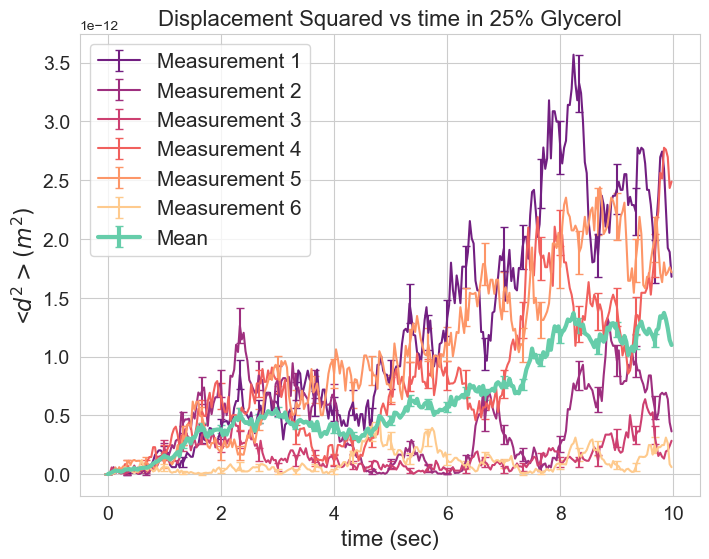

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style("whitegrid")

plt.title('Displacement Squared vs time in 25% Glycerol',
    fontsize=16)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
plt.xlabel('time (sec)', fontsize=16)
plt.ylabel('<$d^2> (m^2)$', fontsize=16)
colors = sns.color_palette("magma", 8)



# Vid 1
plt.errorbar(t_arr, y1, yerr=y1_err, errorevery =(0, 10), capsize=3, label='Measurement 1', color=colors[2])#, barsabove=True)

# Vid 2
plt.errorbar(t_arr, y2, yerr=y2_err, errorevery =(0, 10), capsize=3, label='Measurement 2', color=colors[3])#, barsabove=True)

# Vid 3
plt.errorbar(t_arr, y3, yerr=y3_err, errorevery =(0, 10), capsize=3, label='Measurement 3', color=colors[4])#, barsabove=True)

# Vid 4
plt.errorbar(t_arr, y4, yerr=y4_err, errorevery =(0, 10), capsize=3, label='Measurement 4', color=colors[5])#, barsabove=True)

# Vid 5
plt.errorbar(t_arr, y5, yerr=y5_err, errorevery =(0, 10), capsize=3, label='Measurement 5', color=colors[6])#, barsabove=True)

# Vid 6
plt.errorbar(t_arr, y6, yerr=y6_err, errorevery =(0, 10), capsize=3, label='Measurement 6', color=colors[7])#, barsabove=True)




# Combined: 
plt.errorbar(t_arr, MSD_val, yerr=MSD_err, color='mediumaquamarine', errorevery =(0, 10), capsize=3, label='Mean', linewidth=3)#, barsabove=True)
# Put a legend to the right of the current axis
ax.legend(loc='upper left', prop = { "size": 15 })#, bbox_to_anchor=(1, 0.5))

In [91]:
# Create a DataFrame
df = pd.DataFrame({'time': t_arr, 'time error':t_err[0], 'MSD value': MSD_val, 'MSD error': MSD_err})

# save dataframe to csv file
df.to_csv('MSD_gly25.csv', index=False)

In [92]:
NA_gly25 = avogadro_calculated(1.165e-13/4, T_gly, visco_gly25, R, r)
NA_err_gly25 = NA_err(NA_gly10, T_gly, 0.01, 1.165e-13/4, 3.765e-15/4, 1, 0.035)
NA_full_gly25 = unp.uarray(NA_gly25, NA_err_gly25)

In [93]:
print("Avogadro's number for 25% Glycerol:", NA_gly25, '±' , NA_err_gly25)

Avogadro's number for 25% Glycerol: 2.1193067616829375e+24 ± 7.968414911159157e+22


In [95]:
print('Mean value:', (NA_full_gly25 + NA_full_gly10 + NA_H2O_full)/3)

Mean value: (1.345+/-0.034)e+24


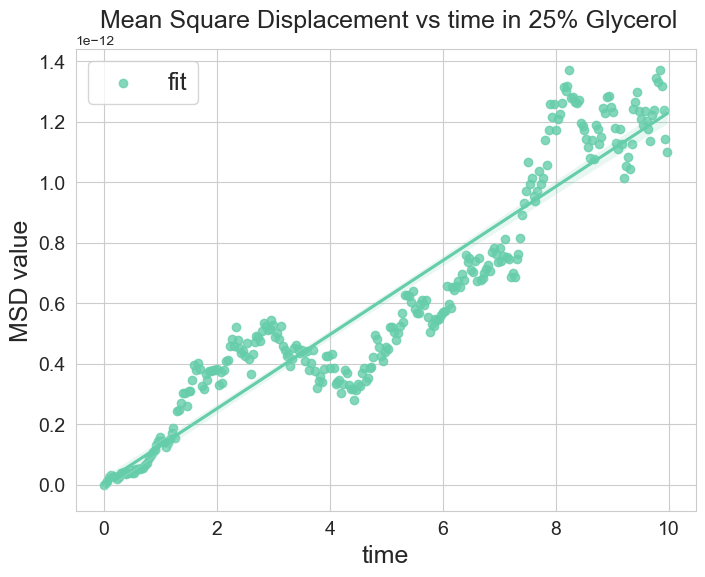

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(' Mean Square Displacement vs time in 25% Glycerol',
    fontsize=18)
ax.tick_params(axis='x', labelsize=14) 
ax.tick_params(axis='y', labelsize=14) 
plt.xlabel('time (sec)', fontsize=18)
plt.ylabel('<$d^2> (m^2)$', fontsize=18)

data = pd.read_csv('MSD_gly25.csv')
sns.regplot(x="time", y="MSD value", data=data, label='fit', color='mediumaquamarine');#: y=(1.165 ± 0.019)$10^{-13}$ x');
plt.legend(fontsize=18)

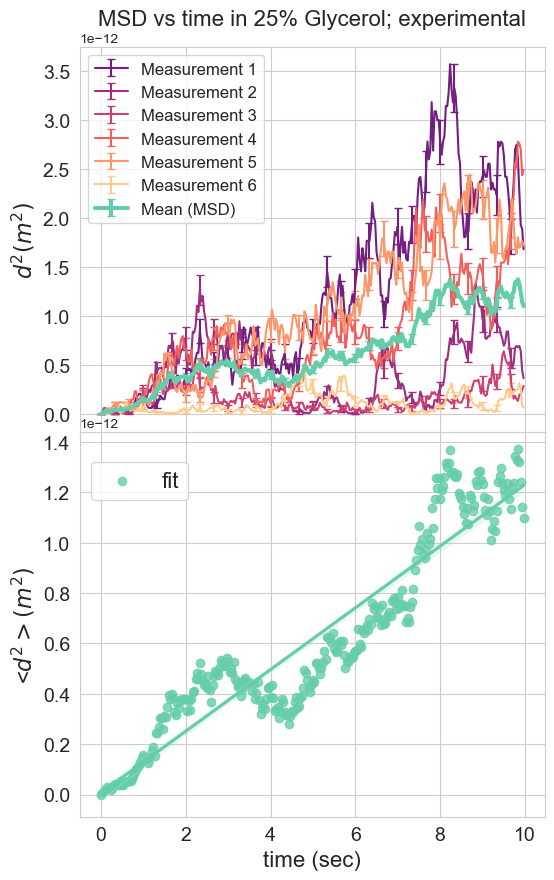

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(6, 10),  sharex=True)
fig.subplots_adjust(hspace=0)
sns.set_style("whitegrid")

ax[0].set_title('MSD vs time in 25% Glycerol; experimental',
    fontsize=16)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_xlabel('time (sec)', fontsize=16)
ax[0].set_ylabel('$d^2 (m^2)$', fontsize=16)

# Vid 1
ax[0].errorbar(t_arr, y1, yerr=y1_err, errorevery =(0, 10), capsize=3, label='Measurement 1', color=colors[2])#, barsabove=True)

# Vid 2
ax[0].errorbar(t_arr, y2, yerr=y2_err, errorevery =(0, 10), capsize=3, label='Measurement 2', color=colors[3])#, barsabove=True)

# Vid 3
ax[0].errorbar(t_arr, y3, yerr=y3_err, errorevery =(0, 10), capsize=3, label='Measurement 3', color=colors[4])#, barsabove=True)

# Vid 4
ax[0].errorbar(t_arr, y4, yerr=y4_err, errorevery =(0, 10), capsize=3, label='Measurement 4', color=colors[5])#, barsabove=True)

# Vid 5
ax[0].errorbar(t_arr, y5, yerr=y5_err, errorevery =(0, 10), capsize=3, label='Measurement 5', color=colors[6])#, barsabove=True)

# Vid 6
ax[0].errorbar(t_arr, y6, yerr=y6_err, errorevery =(0, 10), capsize=3, label='Measurement 6', color=colors[7])#, barsabove=True)

# Combined: 
ax[0].errorbar(t_arr, MSD_val, yerr=MSD_err, color='mediumaquamarine', errorevery =(0, 10), capsize=3, label='Mean (MSD)', linewidth=3)#, barsabove=True)

ax[0].legend(loc='upper left', prop = { "size": 12 })#, bbox_to_anchor=(1, 0.5))

data = pd.read_csv('MSD_gly25.csv')
sns.regplot(x="time", y="MSD value", data=data, ax=ax[1], label='fit', color='mediumaquamarine');#: y=(1.165 ± 0.019)$*10^{-13}$ x');

# Set the axis labels
ax[1].set_ylabel('<$d^2> (m^2)$', fontsize=16)
ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14) 
ax[1].set_xlabel('time (sec)', fontsize=16)

ax[1].legend(loc='upper left', prop = { "size": 16 }, bbox_to_anchor=(0, .95))


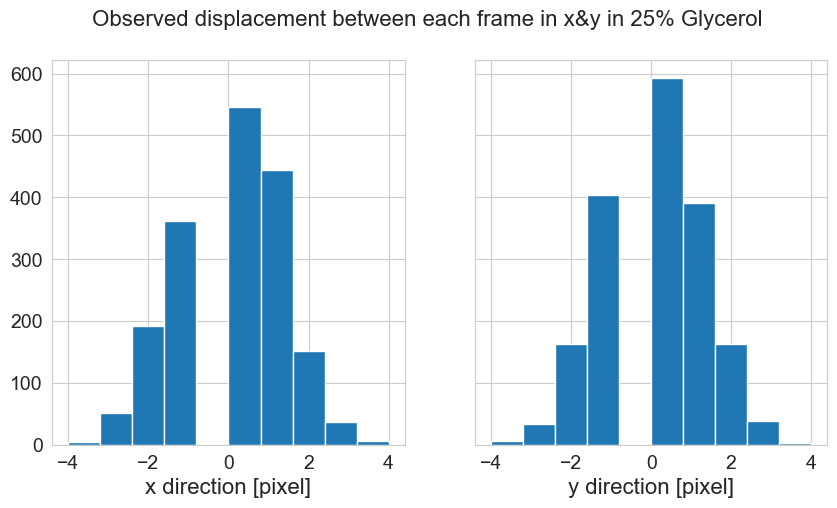

In [98]:
x_diff = []
y_diff = []

for i in range(1, 300):
    x_diff.append(x_H2O1[i-1]-x_H2O1[i])
    x_diff.append(x_H2O2[i-1]-x_H2O2[i])
    x_diff.append(x_H2O3[i-1]-x_H2O3[i])
    x_diff.append(x_H2O4[i-1]-x_H2O4[i])
    x_diff.append(x_H2O5[i-1]-x_H2O5[i])
    x_diff.append(x_H2O6[i-1]-x_H2O6[i])
    
    y_diff.append(y_H2O1[i-1]-y_H2O1[i]) 
    y_diff.append(y_H2O2[i-1]-y_H2O2[i])
    y_diff.append(y_H2O3[i-1]-y_H2O3[i])
    y_diff.append(y_H2O4[i-1]-y_H2O4[i])
    y_diff.append(y_H2O5[i-1]-y_H2O5[i])
    y_diff.append(y_H2O6[i-1]-y_H2O6[i])

fig, ax = plt.subplots(1, 2, figsize=(10, 5),  sharey=True)
fig.subplots_adjust(hspace=0.1)
sns.set_style("whitegrid")
fig.suptitle('Observed displacement between each frame in x&y in 25% Glycerol',
    fontsize=16)
ax[0].tick_params(axis='x', labelsize=14) 
ax[0].tick_params(axis='y', labelsize=14) 
ax[0].set_xlabel('x direction [pixel]', fontsize=16)
x_hist = ax[0].hist((x_diff), bins=10)

ax[1].tick_params(axis='x', labelsize=14) 
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_xlabel('y direction [pixel]', fontsize=16)
y_hist = ax[1].hist((y_diff), bins=10)